In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [2]:
# switching to decimal format in pandas, easier to read numbers
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [3]:
# loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Deep-learning/data_set/ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
# get common statistics and numerical variables
# because it only work with numericals values
# in tis case are 8 nuerical variable
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0
mean,24.3,1.7,86.6,2.4,2.7,2.0,1.0,0.7
std,6.3,0.1,26.2,0.5,0.8,0.6,0.9,0.6
min,14.0,1.4,39.0,1.0,1.0,1.0,0.0,0.0
25%,19.9,1.6,65.5,2.0,2.7,1.6,0.1,0.0
50%,22.8,1.7,83.0,2.4,3.0,2.0,1.0,0.6
75%,26.0,1.8,107.4,3.0,3.0,2.5,1.7,1.0
max,61.0,2.0,173.0,3.0,4.0,3.0,3.0,2.0


In [5]:
#checking wich variables are not number
# also to check how many row and columns
# in this case the requirenment is more than 2000 and this dataset comply it
df.tail(5)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,21.0,Female,1.7,131.4,Sometimes,yes,3.0,3.0,no,no,1.7,yes,1.7,0.9,Sometimes,Public_Transportation,Obesity_Type_III
2107,22.0,Female,1.7,133.7,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.3,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.5,Female,1.8,133.7,Sometimes,yes,3.0,3.0,no,no,2.1,yes,1.4,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.4,Female,1.7,133.3,Sometimes,yes,3.0,3.0,no,no,2.9,yes,1.1,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.7,Female,1.7,133.5,Sometimes,yes,3.0,3.0,no,no,2.9,yes,1.0,0.7,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
#chequing duplicated value
df.duplicated().sum()

24

In [7]:
# removing duplicate value
df.drop_duplicates(inplace=True)

In [8]:
#chequing duplicated value again
df.duplicated().sum()

0

In [9]:
# chequing missing value
# i have not in this case
df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
df.describe().columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [11]:
# saving numerical columns to
numerical_columns = df.describe().columns

In [12]:
no_numerical_columns = df.drop(numerical_columns, axis=1)

In [13]:
#checking number of unique value in my no numerical variable wich fuction i will use to process my data
# to know wich one fuction i will use
unique_counts = no_numerical_columns.nunique()

In [14]:
# in this case i need to convert 9 cvariables in numerical value unsing diferent tecnique
print(unique_counts)

Gender                            2
CALC                              4
FAVC                              2
SCC                               2
SMOKE                             2
family_history_with_overweight    2
CAEC                              4
MTRANS                            5
NObeyesdad                        7
dtype: int64


In [15]:
# label encoder because those columns have only categories
from sklearn.preprocessing import LabelEncoder
variables = ["Gender", "FAVC", "SCC", "SMOKE", "family_history_with_overweight"]
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [16]:
# OneHotEncoder because has more than  2 categories
from sklearn.preprocessing import OneHotEncoder
variables = ["CALC", "CAEC", "MTRANS", "NObeyesdad" ]

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [17]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'SCC',
       'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
       'NObeyesdad_Overweight_Level_II'],
      dtype='object')

In [18]:
# droping no needed  columns using the trick in the material
df.drop(columns=["CALC_no"], inplace=True)
df.drop(columns=["CAEC_no"], inplace=True)
df.drop(columns=["MTRANS_Walking"], inplace=True)
df.drop(columns=["NObeyesdad_Overweight_Level_II"], inplace=True)

In [19]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'SCC',
       'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I'],
      dtype='object')

In [20]:
 # Cheking wich  variables have more correlation with Weight variable and also
 # wich variables are removables
corr_matrix = df.corr()['Weight']
corr_matrix.sort_values(ascending=False)

Weight                            1.0
NObeyesdad_Obesity_Type_III       0.6
family_history_with_overweight    0.5
Height                            0.5
NObeyesdad_Obesity_Type_II        0.4
CAEC_Sometimes                    0.4
FAVC                              0.3
CALC_Sometimes                    0.3
FCVC                              0.2
CH2O                              0.2
Age                               0.2
Gender                            0.2
NObeyesdad_Obesity_Type_I         0.1
NCP                               0.1
MTRANS_Public_Transportation      0.1
SMOKE                             0.0
CALC_Always                      -0.0
MTRANS_Automobile                -0.0
MTRANS_Bike                      -0.0
MTRANS_Motorbike                 -0.0
CALC_Frequently                  -0.0
FAF                              -0.1
TUE                              -0.1
CAEC_Always                      -0.1
NObeyesdad_Overweight_Level_I    -0.2
SCC                              -0.2
NObeyesdad_N

In [21]:
# saving into a removables variable all the variables that have negative correlation
removables = ["NObeyesdad_Insufficient_Weight", "CAEC_Frequently", "NObeyesdad_Normal_Weight", "SCC", "NObeyesdad_Overweight_Level_I", "CAEC_Always", "TUE", "FAF", "CALC_Frequently", "MTRANS_Motorbike", "MTRANS_Bike", "MTRANS_Automobile", "CALC_Always"]

In [22]:
df = df.drop(removables, axis=1)

In [23]:
 # cheking again
corr_matrix = df.corr()['Weight']
corr_matrix.sort_values(ascending=False)

Weight                           1.0
NObeyesdad_Obesity_Type_III      0.6
family_history_with_overweight   0.5
Height                           0.5
NObeyesdad_Obesity_Type_II       0.4
CAEC_Sometimes                   0.4
FAVC                             0.3
CALC_Sometimes                   0.3
FCVC                             0.2
CH2O                             0.2
Age                              0.2
Gender                           0.2
NObeyesdad_Obesity_Type_I        0.1
NCP                              0.1
MTRANS_Public_Transportation     0.1
SMOKE                            0.0
Name: Weight, dtype: float64

In [24]:
df.describe()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SMOKE,CH2O,family_history_with_overweight,CALC_Sometimes,CAEC_Sometimes,MTRANS_Public_Transportation,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III
count,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0
mean,24.4,0.5,1.7,86.9,0.9,2.4,2.7,0.0,2.0,0.8,0.7,0.8,0.7,0.2,0.1,0.2
std,6.4,0.5,0.1,26.2,0.3,0.5,0.8,0.1,0.6,0.4,0.5,0.4,0.4,0.4,0.3,0.4
min,14.0,0.0,1.4,39.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,19.9,0.0,1.6,66.0,1.0,2.0,2.7,0.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,22.8,1.0,1.7,83.1,1.0,2.4,3.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
75%,26.0,1.0,1.8,108.0,1.0,3.0,3.0,0.0,2.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0
max,61.0,1.0,2.0,173.0,1.0,3.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
# in this case i will scale only Age and Weight
num_vars = ['Age', "Weight"]

# MinMaxScaler is the basic scaler. basically: 0 means lowest value in the column
# 1 means highest value in the column. all values will be decimals between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler_with_price = MinMaxScaler()
df[num_vars] = scaler_with_price.fit_transform(df[num_vars])

In [26]:
df.describe()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SMOKE,CH2O,family_history_with_overweight,CALC_Sometimes,CAEC_Sometimes,MTRANS_Public_Transportation,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III
count,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0
mean,0.2,0.5,1.7,0.4,0.9,2.4,2.7,0.0,2.0,0.8,0.7,0.8,0.7,0.2,0.1,0.2
std,0.1,0.5,0.1,0.2,0.3,0.5,0.8,0.1,0.6,0.4,0.5,0.4,0.4,0.4,0.3,0.4
min,0.0,0.0,1.4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.0,1.6,0.2,1.0,2.0,2.7,0.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.2,1.0,1.7,0.3,1.0,2.4,3.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
75%,0.3,1.0,1.8,0.5,1.0,3.0,3.0,0.0,2.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0
max,1.0,1.0,2.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

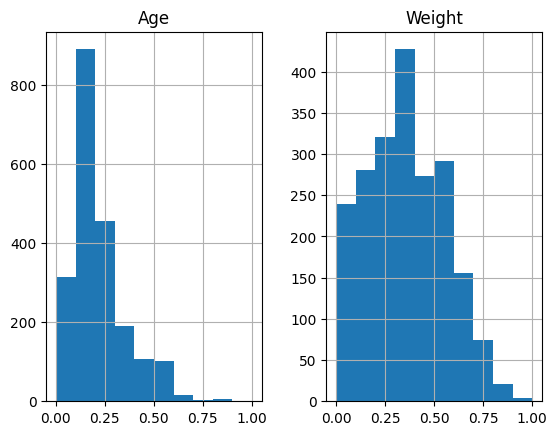

In [27]:
# cheking distribution variable. I will pick up Weight as target variable
df[['Age', 'Weight']].hist()

In [28]:
# preparing the varibles to training my model
X = df.drop("Weight", axis=1)

# have only the target variable here (dependent variable)
y = df["Weight"]

In [29]:
 # splitting 70% and 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# then split again the temporary variables by 50% (so if it was 30% originally => now it's
# 15%/15% (because 30% * 50% = 15%))

# so after this, we have 70% for training, 15% testing, and 15% validation
# => 100% in total
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [30]:
# this model was taken from your examples
#to get the variable amount
training_variable_amount = len(X.columns)

# use ModelCheckpoint to always save the best version of the model
# from anywhere from the model's training history (not just the last epoch)
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True)

# have all callbacks in a list
# this time we only have one
callback_list = [mc]

# create the structure of our neural network
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(training_variable_amount,)),
        layers.Dense(24, activation="relu", kernel_regularizer=keras.regularizers.l2(l=0.1)),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(8, activation="relu"),
        # let's add a Dropout-layer -> usually helps reducing the validation loss
        layers.Dropout(0.1),
        layers.Dense(4, activation="relu"),
        layers.Dense(1)
    ]
)

# compile the neural network, use adam (most common one) as the optimizer
# and mean square error (mse) for the loss function (most common for regression problems)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0015), loss='mse')

# show a quick recap of our structure
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 15)                60        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 24)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                        

In [31]:
# start training , also attaching callbacks
model.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/2000
46/46 [==============================] - 7s 9ms/step - loss: 1.7505 - val_loss: 1.2643
Epoch 2/2000
46/46 [==============================] - 0s 6ms/step - loss: 0.9676 - val_loss: 0.7063
Epoch 3/2000
46/46 [==============================] - 0s 6ms/step - loss: 0.5458 - val_loss: 0.3984
Epoch 4/2000
46/46 [==============================] - 0s 5ms/step - loss: 0.3083 - val_loss: 0.2224
Epoch 5/2000
46/46 [==============================] - 0s 6ms/step - loss: 0.1710 - val_loss: 0.1191
Epoch 6/2000
46/46 [==============================] - 0s 5ms/step - loss: 0.0916 - val_loss: 0.0610
Epoch 7/2000
46/46 [==============================] - 0s 6ms/step - loss: 0.0507 - val_loss: 0.0327
Epoch 8/2000
46/46 [==============================] - 0s 5ms/step - loss: 0.0303 - val_loss: 0.0192
Epoch 9/2000
46/46 [==============================] - 0s 5ms/step - loss: 0.0205 - val_loss: 0.0131
Epoch 10/2000
46/46 [==============================] - 0s 5ms/step - loss: 0.0160 - val_loss: 0.0094

<Axes: >

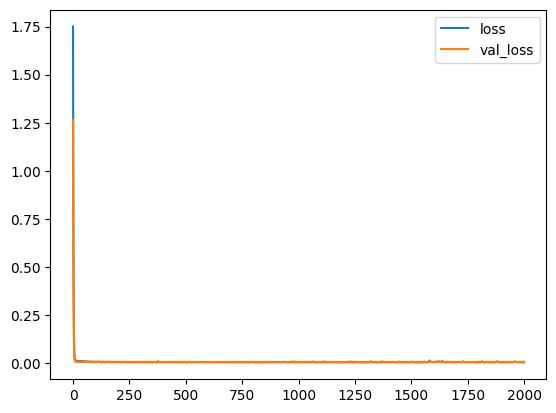

In [32]:
 # model no overfit
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [33]:
# loading the best model version
from keras.models import load_model
model = load_model('best_model.keras')

In [34]:
# evaluation traineing and test
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
0.003739745356142521

Train data evaluation:
0.0035337458830326796


In [35]:
# calculating test predictions based on the TEST DATA SET
# for metrics that follow
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

10/10 [==============================] - 0s 2ms/step


,Test True Y,Model Predictions
0,0.7,0.6
1,0.4,0.4
2,0.1,0.2
3,0.2,0.2
4,0.2,0.2
...,...,...
309,0.3,0.3
310,0.8,0.8
311,0.4,0.4
312,0.3,0.3


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

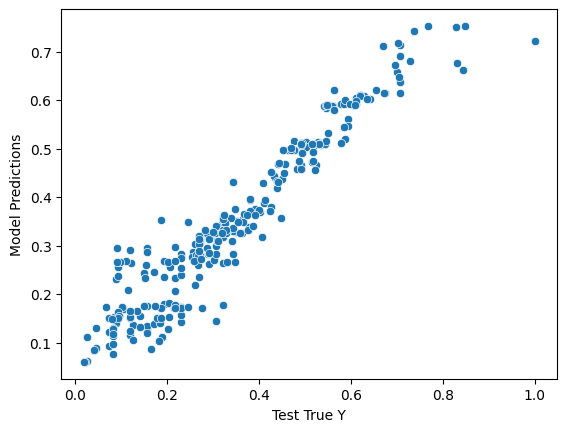

In [36]:

# cheking the sccater plot to chek is the model follow a diagonal line in this case almost exactily
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [37]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "units^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "unit")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
0.04 

MSE
0.0 units^2

RMSE:
0.06 unit

R-squared:
0.91

Explained variance score:
0.91


<ipython-input-38-5854bca5475a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


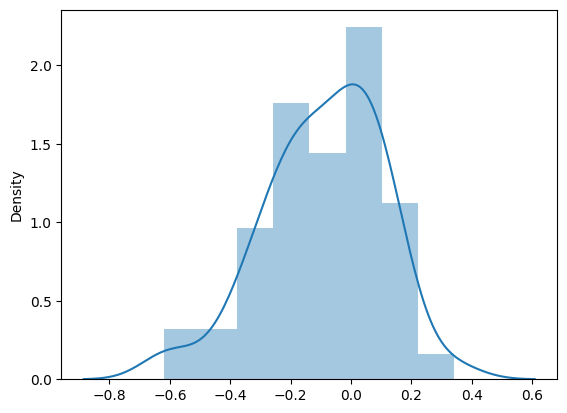

In [38]:
 # residual histogram, does our model also follow
# a normal distribution
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [39]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'SMOKE',
       'CH2O', 'family_history_with_overweight', 'CALC_Sometimes',
       'CAEC_Sometimes', 'MTRANS_Public_Transportation',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III'],
      dtype='object')

In [40]:
df.describe()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SMOKE,CH2O,family_history_with_overweight,CALC_Sometimes,CAEC_Sometimes,MTRANS_Public_Transportation,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III
count,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0
mean,0.2,0.5,1.7,0.4,0.9,2.4,2.7,0.0,2.0,0.8,0.7,0.8,0.7,0.2,0.1,0.2
std,0.1,0.5,0.1,0.2,0.3,0.5,0.8,0.1,0.6,0.4,0.5,0.4,0.4,0.4,0.3,0.4
min,0.0,0.0,1.4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.0,1.6,0.2,1.0,2.0,2.7,0.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.2,1.0,1.7,0.3,1.0,2.4,3.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
75%,0.3,1.0,1.8,0.5,1.0,3.0,3.0,0.0,2.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0
max,1.0,1.0,2.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [41]:
df.tail(1)

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SMOKE,CH2O,family_history_with_overweight,CALC_Sometimes,CAEC_Sometimes,MTRANS_Public_Transportation,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III
2110,0.2,0,1.7,0.7,1,3.0,3.0,0,2.9,1,1,1,1,0,0,1


In [44]:
# trying with some new imaginary data
# in this case the variables that have the most impact
# over Weight are marking with *
# and was taken is maximun value



tester_row = {
    'Age': 23.7,
    'Gender': 0,
    'Height': 1.7,  # *
    'Weight': 20,
    'FAVC': 1,
    'FCVC': 3,
    'NCP': 3,
    "SMOKE": 0,
    'CH2O': 2.9,
    'family_history_with_overweight': 1,
    'CALC_Sometimes': 1,
    'CAEC_Sometimes': 1,  # *
    'MTRANS_Public_Transportation': 1,
    'NObeyesdad_Obesity_Type_I': 0,
    'NObeyesdad_Obesity_Type_II': 0,    # *
    'NObeyesdad_Obesity_Type_III': 1   # *




}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

# scale our tester row with original scaler
# drop Weight-column after scaling
tester_row[num_vars] = scaler_with_price.transform(tester_row[num_vars])
tester_row = tester_row.drop("Weight", axis=1)

# make a prediction and save the scaled result back into the tester_row
result = model.predict(tester_row)[0]
tester_row["Weight"] = result

# final step, inverse transform to get actual values back
tester_row[num_vars] = scaler_with_price.inverse_transform(tester_row[num_vars])
result = tester_row["Weight"]

print()
print(f"Estimated Weight:")
print(f"{round(float(result), 2)} ")
print("----------------")




1/1 [==============================] - 0s 19ms/step

Estimated Weight:
119.84 
----------------


<ipython-input-44-1d12e22c8aed>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{round(float(result), 2)} ")
